In [178]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [179]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo_1.csv")
# match_data_unfiltered.to_excel("exel_test.xlsx")

In [180]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 0
    elif result == "H":
        return 1
    elif result == "A":
        return 2
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [181]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.tail(n=5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
4891,14.05.2022,Mainz,Ein Frankfurt,2.0,2.0,0,1.0,2.0,A,13.0,...,2.001489,-1.884149,1.172358,-1.581157,1.868412,-1.545160,0.652603,-1.330148,849.372072,844.265646
4892,14.05.2022,M'gladbach,Hoffenheim,5.0,1.0,1,3.0,1.0,H,19.0,...,3.347095,-1.133621,1.647127,-4.249006,2.048918,-1.426219,2.062127,-3.467829,877.665071,855.590835
4893,14.05.2022,Stuttgart,FC Koln,2.0,1.0,1,1.0,0.0,H,24.0,...,1.491069,-1.100222,1.535998,-1.369941,0.963734,-1.335884,1.877641,-0.890119,734.655957,762.003692
4894,14.05.2022,Union Berlin,Bochum,3.0,2.0,1,2.0,0.0,H,17.0,...,2.870488,-1.234870,1.944127,-2.321089,2.570349,-0.727307,1.757577,-1.887840,746.240131,389.650242
4895,14.05.2022,Wolfsburg,Bayern Munich,2.0,2.0,0,1.0,2.0,A,10.0,...,1.994849,-1.248584,2.255671,-1.869960,1.949939,-0.849493,2.258790,-1.790906,825.333792,1118.372385


In [182]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()
correlation_matrix_match_data_unfiltered.style.background_gradient()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeElo,AwayElo,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
FTHG,1.000000,-0.115890,-0.158417,0.691083,-0.066105,0.282759,-0.121474,0.529431,-0.122165,-0.110952,-0.079891,0.024723,-0.068897,-0.128651,0.020357,-0.084379,0.065876,0.192706,-0.072156,0.817656,0.132531,-0.124136,-0.762975,0.213256,0.093173,-0.086369,-0.087695,0.165829,-0.045695
FTAG,-0.115890,1.000000,0.464526,-0.077238,0.681759,-0.110333,0.297404,-0.118181,0.534106,-0.010506,-0.051651,-0.042649,0.063109,0.091277,-0.060410,0.134629,-0.058063,-0.050974,0.172909,-0.124901,-0.766000,0.718631,0.130186,-0.090630,-0.066225,0.166395,0.083982,-0.028317,0.149910
FTR,-0.158417,0.464526,1.000000,-0.119945,0.291566,-0.090089,0.148044,-0.111597,0.261484,-0.008017,-0.042539,-0.037080,0.027992,0.016190,-0.069442,0.069038,-0.064325,-0.042381,0.092592,-0.139766,-0.368168,0.339708,0.150550,-0.060737,-0.052937,0.087979,0.063726,-0.028519,0.078586
HTHG,0.691083,-0.077238,-0.119945,1.000000,-0.078063,0.126746,-0.059225,0.339639,-0.082490,-0.049028,-0.053229,-0.037902,-0.006581,-0.111528,0.013452,-0.029325,0.020904,0.128916,-0.044013,0.574226,0.094772,-0.077146,-0.517303,0.160720,0.070694,-0.050489,-0.046817,0.110656,-0.026045
HTAG,-0.066105,0.681759,0.291566,-0.078063,1.000000,-0.017061,0.147804,-0.047770,0.331774,0.001003,-0.007671,0.032551,-0.000917,0.075908,-0.053471,0.064540,-0.000982,-0.027334,0.134705,-0.069947,-0.518497,0.500669,0.082534,-0.051828,-0.042754,0.128496,0.060822,-0.012263,0.119317
HS,0.282759,-0.110333,-0.090089,0.126746,-0.017061,1.000000,-0.316971,0.664345,-0.199804,-0.120852,0.039524,0.508935,-0.254611,-0.121168,0.055733,-0.103701,0.095520,0.063736,-0.189992,0.298766,0.126035,-0.175945,-0.254642,0.191916,0.108350,-0.166592,-0.102839,0.060782,-0.186790
AS,-0.121474,0.297404,0.148044,-0.059225,0.147804,-0.316971,1.000000,-0.199331,0.676266,0.064472,-0.076242,-0.244556,0.486411,0.108685,-0.061900,0.097864,-0.082758,-0.122667,0.106571,-0.164239,-0.277561,0.290737,0.141888,-0.155844,-0.127416,0.170413,0.104533,-0.119019,0.102988
HST,0.529431,-0.118181,-0.111597,0.339639,-0.047770,0.664345,-0.199331,1.000000,-0.087377,-0.052120,0.032089,0.311088,-0.159436,-0.116918,0.036144,-0.086779,0.089747,0.016793,-0.235931,0.479845,0.142784,-0.164671,-0.414579,0.199530,0.120579,-0.145003,-0.074459,0.005244,-0.223937
AST,-0.122165,0.534106,0.261484,-0.082490,0.331774,-0.199804,0.676266,-0.087377,1.000000,0.064358,-0.023169,-0.145561,0.322492,0.098727,-0.067452,0.092219,-0.059565,-0.153934,0.055267,-0.141689,-0.434150,0.417998,0.150607,-0.117306,-0.087985,0.143030,0.112253,-0.142614,0.044177
HF,-0.110952,-0.010506,-0.008017,-0.049028,0.001003,-0.120852,0.064472,-0.052120,0.064358,1.000000,0.350923,-0.083828,0.012621,0.322449,0.097079,0.076233,0.059689,-0.444572,-0.368586,-0.183680,-0.037472,-0.030441,0.070650,-0.184827,-0.065741,-0.027497,0.009197,-0.442968,-0.367831


In [183]:
# filter for specific columns
# match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    # "AwayAttackOld", "AwayDefendOld"
# print correlation matrix
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld", "AwayAttackOld", "AwayDefendOld"]]

correlation_matrix_match_data_reduced = match_data_reduced.corr()
correlation_matrix_match_data_reduced.style.background_gradient()

,FTR,FTHG,FTAG,HomeEloOld,AwayEloOld,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld
FTR,1.000000,-0.158417,0.464526,-0.028519,0.078586,-0.060737,-0.052937,0.087979,0.063726
FTHG,-0.158417,1.000000,-0.115890,0.165829,-0.045695,0.213256,0.093173,-0.086369,-0.087695
FTAG,0.464526,-0.115890,1.000000,-0.028317,0.149910,-0.090630,-0.066225,0.166395,0.083982
HomeEloOld,-0.028519,0.165829,-0.028317,1.000000,0.668072,0.317477,0.077238,0.042324,-0.058508
AwayEloOld,0.078586,-0.045695,0.149910,0.668072,1.000000,0.051041,-0.056731,0.315563,0.088859
HomeAttackOld,-0.060737,0.213256,-0.090630,0.317477,0.051041,1.000000,0.196511,0.013204,0.006045
HomeDefendOld,-0.052937,0.093173,-0.066225,0.077238,-0.056731,0.196511,1.000000,-0.013643,0.019664
AwayAttackOld,0.087979,-0.086369,0.166395,0.042324,0.315563,0.013204,-0.013643,1.000000,0.188030
AwayDefendOld,0.063726,-0.087695,0.083982,-0.058508,0.088859,0.006045,0.019664,0.188030,1.000000


In [184]:
X = match_data_unfiltered.loc[:, ["HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

# y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
y = match_data_unfiltered.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [185]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [186]:
clf.predict(X_test)

array([2, 1, 2, ..., 2, 2, 0], dtype=int64)

In [187]:
result = clf.score(X_test, y_test)

In [188]:
result

0.38613861386138615

Confusion matrix, without normalization
[[117 175 114]
 [183 359 169]
 [144 207 148]]
Normalized confusion matrix
[[0.28817734 0.43103448 0.28078818]
 [0.25738397 0.50492264 0.23769339]
 [0.28857715 0.41482966 0.29659319]]


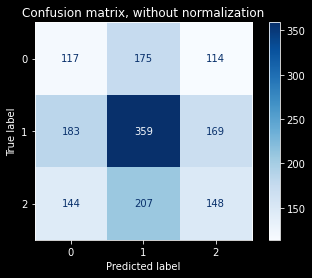

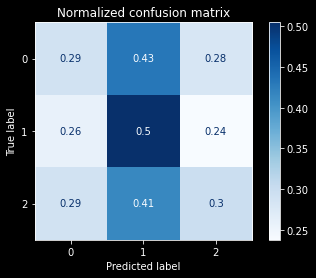

In [189]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Ensemble Learning

In [190]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn import linear_model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [191]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]

In [192]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [193]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = cross_val_score(model,
                             X,
                             y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=-1,
                             error_score='raise')
    return scores

>lr 0.499 (0.010)
>lda 0.498 (0.010)
>knn 0.419 (0.014)
>cart 0.389 (0.014)
>svm 0.487 (0.008)
>bayes 0.486 (0.010)


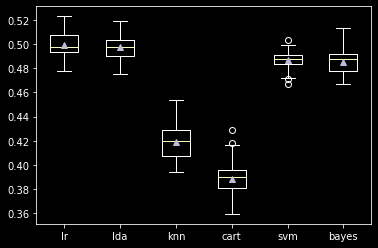

In [194]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [195]:
models

{'lr': LogisticRegression(),
 'lda': LinearDiscriminantAnalysis(),
 'knn': KNeighborsClassifier(),
 'cart': DecisionTreeClassifier(),
 'svm': SVC(),
 'bayes': GaussianNB()}

#### Stack the single models to a combination

In [196]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('lda', LinearDiscriminantAnalysis()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [197]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models


>lr 0.499 (0.010)
>lda 0.498 (0.010)
>knn 0.419 (0.014)
>cart 0.389 (0.015)
>svm 0.487 (0.008)
>bayes 0.486 (0.010)
>stacking 0.499 (0.010)


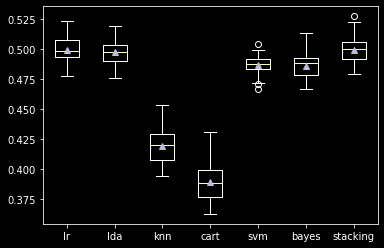

In [198]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Neural Network

In [199]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [200]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)


(3280, 6)
(1616, 6)


In [201]:
y_train

,FTR
2970,0
4026,2
1774,1
3182,2
4473,1
...,...
4426,1
466,1
3092,0
3772,2


In [202]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

3


In [203]:
model = Sequential()
# model.add(Dense(500, activation='relu', input_dim=6))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(3, activation='softmax'))

model.add(Dense(500, activation='relu', input_dim=6))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [204]:
# build the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
103/103 [==============================] - 0s 2ms/step - loss: 3.1857 - accuracy: 0.4034
Epoch 2/20
103/103 [==============================] - 0s 1ms/step - loss: 1.3317 - accuracy: 0.4247
Epoch 3/20
103/103 [==============================] - 0s 2ms/step - loss: 1.2184 - accuracy: 0.4375
Epoch 4/20
103/103 [==============================] - 0s 2ms/step - loss: 1.3263 - accuracy: 0.4268
Epoch 5/20
103/103 [==============================] - 0s 2ms/step - loss: 1.2780 - accuracy: 0.4396
Epoch 6/20
103/103 [==============================] - 0s 2ms/step - loss: 1.2145 - accuracy: 0.4473
Epoch 7/20
103/103 [==============================] - 0s 2ms/step - loss: 1.2275 - accuracy: 0.4473
Epoch 8/20
103/103 [==============================] - 0s 2ms/step - loss: 1.0907 - accuracy: 0.4710
Epoch 9/20
103/103 [==============================] - 0s 2ms/step - loss: 1.0917 - accuracy: 0.4738
Epoch 10/20
103/103 [==============================] - 0s 2ms/step - loss: 1.1105 - accuracy: 0.4643

In [205]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.5091463327407837% 
 Error on training data: 0.4908536672592163
Accuracy on test data: 0.49381187558174133% 
 Error on test data: 0.5061881244182587


In [213]:
# y_pred = [[1 if np.max(j)==i for i in j else 0] for j in pred_test]
y_pred = []
alpha = 0.15
for test in pred_test:
    # list_temp = []
    # for counter, j in enumerate(test):
    #     if np.max(test)==j:
    #         y_pred.append(counter)
    print(test[1])
    if test[1] > test[0]+alpha and test[1] > test[2]:
        y_pred.append(1)
    elif test[2] > test[0]+alpha:
        y_pred.append(2)
    else:
        y_pred.append(0)
        #     list_temp.append(1)
        # else:
        #     list_temp.append(0)
    # y_pred.append(list_temp)
y_pred
y_test_res = []
for test in y_test:
    # list_temp = []
    for counter, j in enumerate(test):
        if np.max(test)==j:
            y_test_res.append(counter)

0.3940165
0.4341505
0.16400331
0.40563995
0.39388898
0.27280632
0.49662042
0.23310943
0.4478906
0.51469827
0.65045255
0.537486
0.2558243
0.57912993
0.41978693
0.45301175
0.47379902
0.53406435
0.310618
0.63928986
0.3362152
0.5233807
0.5808408
0.5366591
0.19143662
0.4662154
0.5717008
0.5316393
0.60434204
0.42237368
0.6416639
0.38069457
0.29628652
0.24511057
0.29770947
0.5366696
0.4164933
0.4066523
0.56525135
0.5110701
0.26261592
0.4833211
0.44350666
0.49159843
0.50207454
0.34744802
0.48899245
0.48608962
0.38026696
0.39686114
0.2720706
0.41493326
0.3541434
0.53440255
0.41424504
0.52609766
0.4278251
0.48836547
0.4085938
0.41159335
0.427574
0.37250558
0.40024352
0.5609172
0.4144095
0.43295497
0.2757793
0.5443249
0.37688756
0.34453088
0.46026057
0.6901799
0.47171086
0.55556476
0.35269707
0.29272893
0.5479715
0.50880665
0.4578725
0.33300865
0.5430665
0.64392096
0.5017514
0.34527186
0.43197873
0.5664652
0.17132422
0.42225114
0.46417454
0.4553206
0.3832913
0.4170552
0.18690653
0.19171375
0.4169

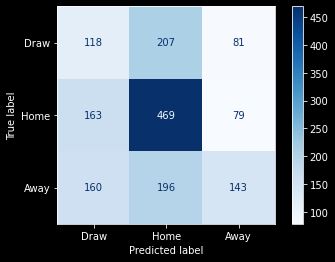

In [214]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test_res, y_pred) #, labels=["Draw", "Home", "Away"])
cfd = ConfusionMatrixDisplay(cf, display_labels=["Draw", "Home", "Away"])
cfd.plot(cmap=plt.cm.Blues)

In [208]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
models['lr'],
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
models['lr']

LogisticRegression()

In [ ]:
results

[array([0.51632653, 0.48723187, 0.50459653, 0.48518897, 0.50868233,
        0.49489796, 0.50970378, 0.49336057, 0.49642492, 0.50766088,
        0.49285714, 0.48621042, 0.49336057, 0.51378958, 0.49948927,
        0.50510204, 0.49029622, 0.49336057, 0.49131767, 0.51072523,
        0.5       , 0.50868233, 0.49438202, 0.49131767, 0.49642492,
        0.49795918, 0.52298264, 0.49642492, 0.49846782, 0.49540347,
        0.47755102, 0.49336057, 0.50970378, 0.51481103, 0.50561798,
        0.51326531, 0.48927477, 0.49336057, 0.51174668, 0.49029622,
        0.50204082, 0.51378958, 0.49336057, 0.50051073, 0.47906027,
        0.49795918, 0.48621042, 0.50663943, 0.50561798, 0.49846782]),
 array([0.51530612, 0.48518897, 0.50868233, 0.48621042, 0.49948927,
        0.49489796, 0.50153218, 0.49131767, 0.49948927, 0.50868233,
        0.48979592, 0.48621042, 0.49336057, 0.51378958, 0.49438202,
        0.50306122, 0.48927477, 0.49233912, 0.48927477, 0.50766088,
        0.50306122, 0.50153218, 0.49846782, 0.